# 単回帰の最小二乗推定量の導出と検定を実装してみる

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [47]:
# データセットの読み込み
df = pd.read_pickle('../article_00003_1/dummy_data.pkl')
df = df[['milk','height']]

In [48]:
print(f'サンプルサイズは{len(df)}')
df.info()

サンプルサイズは120
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   milk    120 non-null    float64
 1   height  120 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


Text(0, 0.5, 'height (cm)')

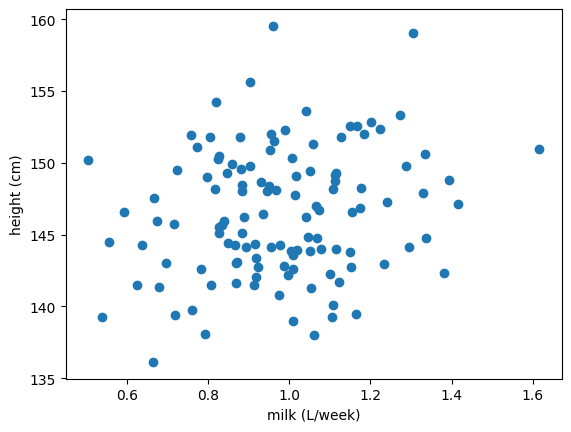

In [49]:
plt.scatter(
	df.milk,
	df.height,
)
plt.xlabel('milk (L/week)')
plt.ylabel('height (cm)')

$$
\begin{align*}
  \hat{\beta_2} &= \frac{\bar{XY} - \bar{X}\bar{Y}}{\bar{X^2} - \bar{X}^2} \\
    &= \frac{\sum_{i=1}^{n} (X_i-\bar{X})(Y_i-\bar{Y})}{\sum_{i=1}^{n} (X_i-\bar{X})^2} \\
    &= \frac{Cov(XY)}{V(X)} \\
  \hat{\beta_1} &= \bar{Y} - \hat{\beta_2} \bar{X}
\end{align*}
$$

In [50]:
x = df.milk
y = df.height

In [51]:
v_x, cov_xy = np.cov(x,y,ddof=0)[0]
beta_2 = cov_xy/v_x
beta_1 = np.mean(y) - beta_2*np.mean(x)

print(f'beta_1 = {beta_1:.3f}')
print(f'beta_2 = {beta_2:.3f}')

beta_1 = 142.160
beta_2 = 4.438


$$
\begin{align*}
s^2 &= \frac{\sum{e_i^2}}{n-2} \\
s.e.(\hat{\beta_2}_{OLS})^2 &= \frac{s^2}{\sum_{i=1}^{n} (X_i-\bar{X})^2}\\
  t
  &= \frac{\hat{\beta_2}_{OLS} - E(\hat{\beta_2}_{OLS})}{\sqrt{u^2}} \\
  &= \frac{\hat{\beta_2}_{OLS} - \beta_2}{s.e.(\hat{\beta_2}_{OLS})} \sim t(dof)\\
\end{align*}
$$

In [52]:
y_hat = beta_1 + beta_2 * x
error = y_hat - y
s_2 = np.var(error,ddof=2)
se_beta_2 = np.sqrt(s_2/np.sum(np.power(x-np.mean(x),2)))
print(f'最小二乗推定量を用いた時の・・・')
print(f'標本誤差の平均は{np.mean(error):.3f}')
print(f'標本誤差の分散は{s_2:.3f}')
print(f'beta_2の標準誤差は{se_beta_2:.3f}')

最小二乗推定量を用いた時の・・・
標本誤差の平均は-0.000
標本誤差の分散は19.222
beta_2の標準誤差は1.993


In [53]:
# 帰無仮説beta = 0を設定したt統計量

t = beta_2/se_beta_2
print(f'帰無仮説(beta = 0)を設定したt統計量 {t:.3f}')

帰無仮説(beta = 0)を設定したt統計量 2.227


In [54]:
dof = len(x)-2
print(f'自由度は{dof}')

自由度は118


自由度のt分布を観察する。
検定は両側検定で棄却水準は5%とする。

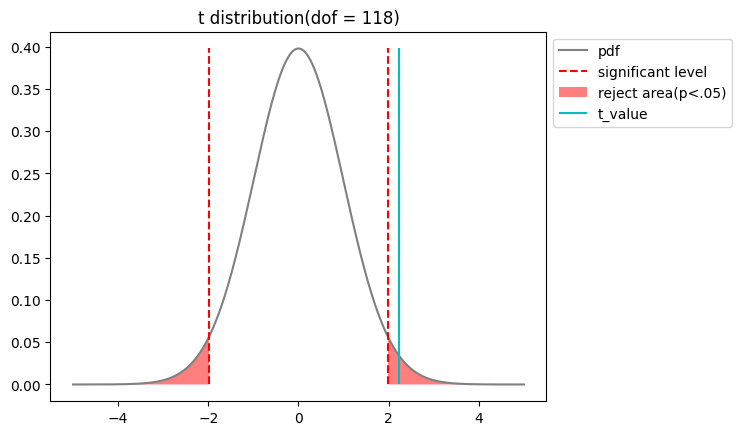

In [82]:
import scipy.stats as stats

x_t = np.linspace(-5,5,1000)
y_t = stats.t.pdf(x_t,dof)
p = 0.05
upper_limit = stats.t.ppf(q=1-p/2,df = dof)

plt.plot(x_t,y_t,c='gray',label = 'pdf')
plt.vlines(ymin=0,ymax=np.max(y_t),x=upper_limit,linestyles='--',color='red',label='significant level')
plt.vlines(ymin=0,ymax=np.max(y_t),x=-upper_limit,linestyles='--',color='red')
plt.fill_between(x_t,y_t,where=x_t<-upper_limit,facecolor='red',alpha=.5,label = f'reject area(p<.05)')
plt.fill_between(x_t,y_t,where=x_t>upper_limit,facecolor='red',alpha=.5)

plt.vlines(ymin=0,ymax=np.max(y_t),x=t,linestyles='-',color='c',label='t_value')

plt.title(f't distribution(dof = {dof})')
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1, 1),
    ncol=1,
    )


t統計量が棄却域に入ったため、帰無仮説を棄却し、対立仮説$\beta_2 \neq 0$を採択する。
$\beta_2$の推定量は4.438である。

In [84]:
print(f'{upper_limit:.3f}')

1.980


ちなみに、自由度118のt分布の95%信頼区間は$-1.98 < t < 1.98$であり、$t = \frac{\hat{\beta_2}_{OLS} - \beta_2}{s.e.(\hat{\beta_2}_{OLS})}$を代入して$beta_2$について解くと、
$$
\hat{\beta_2}_{OLS} - 1.98 \times s.e.(\hat{\beta_2}_{OLS})
 < \beta_2 <
\hat{\beta_2}_{OLS} + 1.98 \times s.e.(\hat{\beta_2}_{OLS})
$$

In [86]:
beta_bottom = beta_2 - upper_limit*se_beta_2
beta_top = beta_2 + upper_limit*se_beta_2

print(f'beta_2の95%信頼区間は{beta_bottom:.3f}~{beta_top:.3f}')

beta_2の95%信頼区間は0.492~8.384
